# Project Name - Random Forest for Credit Scoring

## Objective :-
**To train a machine learning model to predict creditworthiness based on financial attributes**

# AUTHOR :- ABDDULLAHI LABARAN


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset
statlog_german_credit_data = fetch_ucirepo(id=144) 

In [3]:
# Data (as pandas dataframes)
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 

In [4]:
# metadata
print(statlog_german_credit_data.metadata) 

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [5]:
# variable information
print(statlog_german_credit_data.variables)

           name     role         type     demographic  \
0    Attribute1  Feature  Categorical            None   
1    Attribute2  Feature      Integer            None   
2    Attribute3  Feature  Categorical            None   
3    Attribute4  Feature  Categorical            None   
4    Attribute5  Feature      Integer            None   
5    Attribute6  Feature  Categorical            None   
6    Attribute7  Feature  Categorical           Other   
7    Attribute8  Feature      Integer            None   
8    Attribute9  Feature  Categorical  Marital Status   
9   Attribute10  Feature  Categorical            None   
10  Attribute11  Feature      Integer            None   
11  Attribute12  Feature  Categorical            None   
12  Attribute13  Feature      Integer             Age   
13  Attribute14  Feature  Categorical            None   
14  Attribute15  Feature  Categorical           Other   
15  Attribute16  Feature      Integer            None   
16  Attribute17  Feature  Categ

In [6]:
# Preprocess the data
# Rename the target column for consistency
y.name = 'creditworthy'


In [7]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [8]:
# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names(categorical_cols)

In [9]:
# Drop original categorical columns from X and concatenate with encoded columns
X_numerical = X.drop(columns=categorical_cols)
X_final = pd.concat([X_encoded, X_numerical], axis=1)

In [10]:
# Identify categorical columns and apply one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

In [12]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [13]:
# Train the model
model.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Temp/ipykernel_33168/3283114862.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
# Make predictions
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


In [16]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.92      0.84       209
           2       0.66      0.34      0.45        91

    accuracy                           0.75       300
   macro avg       0.71      0.63      0.64       300
weighted avg       0.73      0.75      0.72       300



Confusion Matrix:


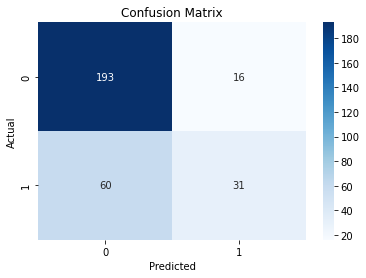

In [17]:
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

In [19]:
print('Feature Importances:')
for i in range(len(importances)):
    print(f"{X_final.columns[indices[i]]}: {importances[indices[i]]:.4f}")

Feature Importances:
Attribute5: 0.1155
Attribute13: 0.0939
Attribute2: 0.0864
Attribute1_A14: 0.0646
Attribute8: 0.0417
Attribute11: 0.0379
Attribute3_A34: 0.0259
Attribute19_A192: 0.0227
Attribute1_A12: 0.0208
Attribute15_A152: 0.0207
Attribute4_A43: 0.0204
Attribute14_A143: 0.0200
Attribute16: 0.0199
Attribute9_A92: 0.0195
Attribute6_A65: 0.0181
Attribute7_A72: 0.0178
Attribute17_A173: 0.0177
Attribute7_A73: 0.0169
Attribute12_A123: 0.0169
Attribute7_A75: 0.0168
Attribute9_A93: 0.0166
Attribute3_A32: 0.0165
Attribute12_A122: 0.0163
Attribute17_A172: 0.0154
Attribute12_A124: 0.0147
Attribute4_A49: 0.0147
Attribute4_A42: 0.0144
Attribute17_A174: 0.0144
Attribute7_A74: 0.0141
Attribute3_A31: 0.0130
Attribute6_A62: 0.0124
Attribute10_A103: 0.0108
Attribute18: 0.0108
Attribute4_A46: 0.0096
Attribute15_A153: 0.0094
Attribute1_A13: 0.0094
Attribute3_A33: 0.0094
Attribute4_A41: 0.0092
Attribute6_A63: 0.0088
Attribute9_A94: 0.0084
Attribute10_A102: 0.0080
Attribute14_A142: 0.0072
Attribute6_

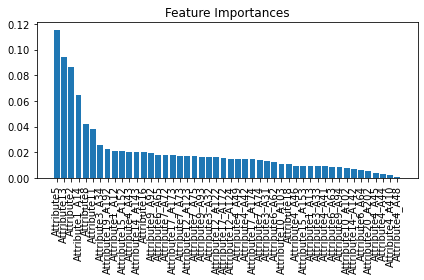

In [20]:
# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [X_final.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()